In [1]:
import pandas as pd

In [2]:
PATH = 'bond_issue_log.csv'

In [3]:
data = pd.read_csv(PATH)
data.head()

,module,title,description,assigned,reopened #,sprint / week #,status,severity
0,Core,Ut semper pretium neque. Morbi quis urna. Nunc,"aliquet, sem ut cursus luctus, ipsum leo eleme...",Boris Townsend,2,14,verified,normal
1,Module E,"placerat, orci lacus vestibulum lorem, sit","nonummy ac, feugiat non, lobortis quis, pede. ...",David Ward,1,24,verified,normal
2,Core,"dictum cursus. Nunc mauris elit, dictum",sit amet orci. Ut sagittis lobortis mauris. Su...,Katell Bond,1,13,postponed,high
3,Module F,"sagittis augue, eu tempor erat",nisi. Aenean eget metus. In nec orci. Donec ni...,Maia Walker,2,37,verified,high
4,Core,"bibendum. Donec felis orci, adipiscing non, lu...",nunc. Quisque ornare tortor at risus. Nunc ac ...,Natalie York,0,15,verified,high


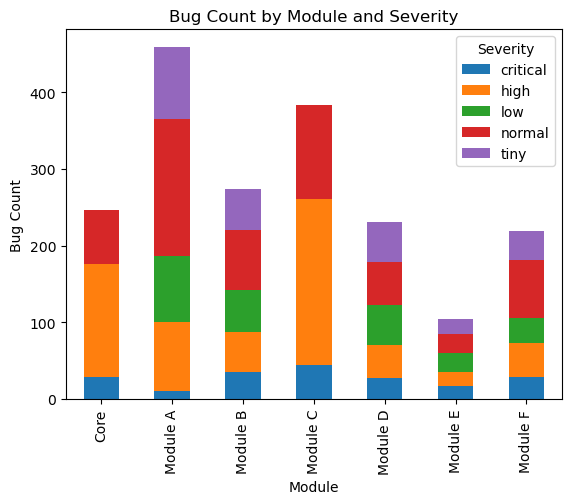

The least reliable component by bugs and their severity is: Module C


In [4]:
# 1. What is the least reliable component of the system?

least_reliable_module = data.groupby(['module', 'severity'])['description'].count().reset_index(name='count')

import matplotlib.pyplot as plt
pivot_table = least_reliable_module.pivot(index='module', columns='severity', values='count')

# Plot the result
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Module')
plt.ylabel('Bug Count')
plt.title('Bug Count by Module and Severity')
plt.legend(title='Severity')
plt.show()

# include severity in counting of bugs per module
severity_weights = {'tiny': 0.3, 'low': 0.5, 'normal': 0.7, 'high': 0.9, 'critical': 1}
least_reliable_module['weighted_severity_of_bug'] = least_reliable_module['severity'].map(severity_weights)
least_reliable_module['weighted_count'] = least_reliable_module['count'] * least_reliable_module['weighted_severity_of_bug']

module_with_most_value = least_reliable_module.groupby('module')['weighted_count'].sum().idxmax()
print(f"The least reliable component by bugs and their severity is: {module_with_most_value}")


<AxesSubplot: xlabel='sprint / week #'>

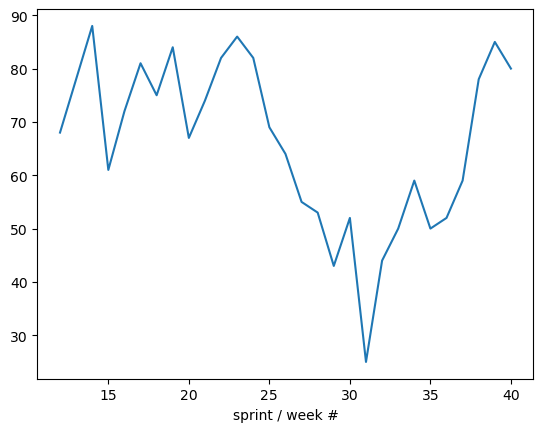

In [5]:
# 2. Is the situation improving over timeline?
data.groupby('sprint / week #')['title'].count().plot()

The situation improved until the 31th sprint, but then worsened again

The most dynamic weeks in testing/development were: [38, 33, 34, 36, 37]


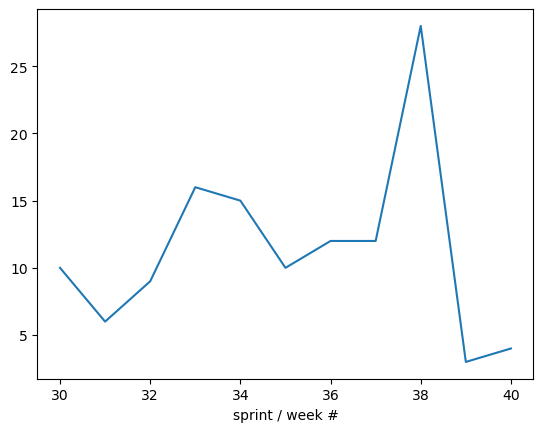

In [6]:
# 3. What weeks were the most dynamic in testing/development?
most_dynamic = data[data['status'].isin(['in dev', 'in qa'])].groupby('sprint / week #')['status'].count().sort_values(ascending=False).index[:5]
data[data['status'].isin(['in dev', 'in qa'])].groupby('sprint / week #')['status'].count().plot()
print(f"The most dynamic weeks in testing/development were: {list(most_dynamic)}")


The weeks with least new issues is: [31, 33, 36, 37, 30]


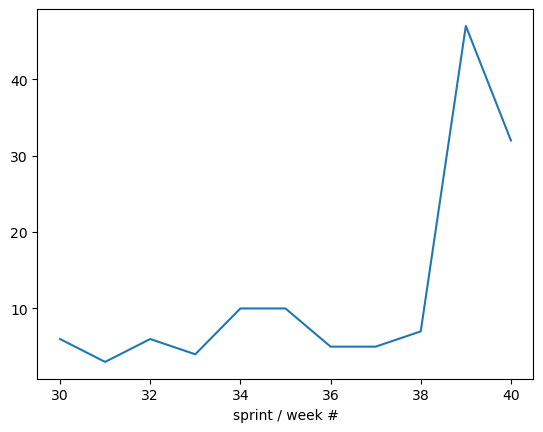

In [7]:

# 4. What weeks were the most silent?
most_silent = data[data['status'] == 'open'].groupby('sprint / week #')['status'].count().sort_values().index[:5]
data[data['status'] == 'open'].groupby('sprint / week #')['status'].count().plot()
print(f"The weeks with least new issues is: {list(most_silent)}")


In [8]:

# 5. Suggest a threshold for bug quantity per week (take into consideration their severity)
severity_weights = {'tiny': 0.3, 'low':0.5,  'normal': 0.7, 'high': 0.9, 'critical': 1}
data['weighted_severity_of_bug'] = data['severity'].map(severity_weights)
weekly_bugs = data.groupby('sprint / week #')['weighted_severity_of_bug'].sum() 
threshold = weekly_bugs.mean()+ (2 * weekly_bugs.std())
print(f"A suggested threshold for bug quantity per week is {threshold:.2f} bugs.")

A suggested threshold for bug quantity per week is 70.56 bugs.
